# Getting started with Xarray to work with CMIP5/6 data

see here for more info: http://xarray.pydata.org/en/stable/

Install using conda:
http://xarray.pydata.org/en/stable/installing.html#instructions

In [1]:
import xarray as xr
import numpy as np

%matplotlib inline

### Open dataset

In [2]:
'''
Download some CMIP6 sample data from here:
http://esgdata.gfdl.noaa.gov/thredds/fileServer/gfdl_dataroot3/CMIP/NOAA-GFDL/GFDL-AM4/
    amip/r1i1p1f1/Amon/tas/gr1/v20180807/tas_Amon_GFDL-AM4_amip_r1i1p1f1_gr1_198001-201412.nc'

Note that this is only monthly data, but serves the purpose of getting familiar with Xarray

'''

file = '/home/scott/.baspy/sample_data/tas_Amon_GFDL-AM4_amip_r1i1p1f1_gr1_198001-201412.nc'
ds   = xr.open_dataset(file)

print(ds)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 420)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 ...
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon        (lon) float64 0.625 1.875 3.125 4.375 5.625 6.875 8.125 9.375 ...
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 1980-02-15T12:00:00 ...
Data variables:
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, bnds) datetime64[ns] ...
Attributes:
    title:                 NOAA GFDL GFDL-AM4 model output prepared for CMIP6...
    history:               File was processed by fremetar (GFDL analog of CMO...
    table_id:              Amon
    contact:               gfdl.climate.model.info@noaa.gov
    comment:               <null ref>
    tracking_id:           hdl:21.14100/3b95ceac-9bd6-42c9-a130-130fc1ba108c
    further_info_url:      https://furth

### Extract a single climate variable from the dataset (tas = Near-Surface Air Temperature)

In [3]:
da= ds.tas
da

<xarray.DataArray 'tas' (time: 420, lat: 180, lon: 288)>
[21772800 values with dtype=float32]
Coordinates:
    height   float64 ...
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float64 0.625 1.875 3.125 4.375 5.625 6.875 8.125 9.375 ...
  * time     (time) datetime64[ns] 1980-01-16T12:00:00 1980-02-15T12:00:00 ...
Attributes:
    long_name:      Near-Surface Air Temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    standard_name:  air_temperature
    interp_method:  conserve_order2
    original_name:  tas

### Plot a map for the first time instance

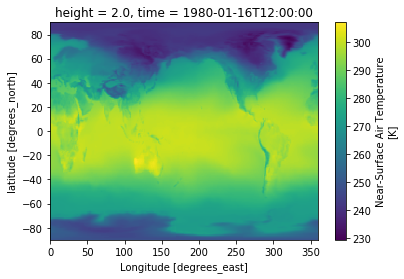

In [4]:
da.isel(time=0).plot()

### Resampling data to a new grid

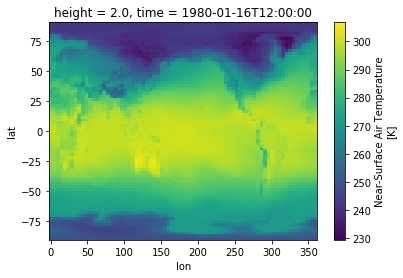

In [5]:
lons_new = np.linspace(da.lon.min(), da.lon.max(), 75)
lats_new = np.linspace(da.lat.min(), da.lat.max(), 75)
da1 = da.interp(coords={'lat':lats_new, 'lon':lons_new}, method='linear')

da1.isel(time=0).plot()

### Extract a time series for a given point

/home/scott/miniconda3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:2514: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.values[idx_res]


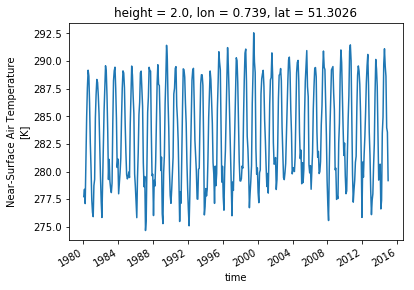

In [12]:
london = da.interp(coords={ 'lon':0.739, 'lat':51.3026 }, method='nearest')

london_df = london.to_dataframe()
london_df = london_df.reset_index()
london_df.to_csv('model_data_for_london.csv', index=False)

london.plot()

### Notes 

Useful links
* Xarray: http://xarray.pydata.org/en/stable/
* Dask: http://dask.pydata.org/en/latest/

Things we need to think about...
* How can we use machine learning toolkits (tensorflow, GPFlow, Will's Julia code) with Xarray (and Dask for scaling Xarray processes across a large number of CPUs, see link above)
